In [15]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sns  
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import optuna
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from xgboost import XGBRegressor
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')  # ignore notifications
import sys
import os

In [16]:
dataframe = pd.read_csv('tsne_transdormed.csv')
dataframe

,TSNE_1,TSNE_2,TSNE_26,TSNE_27,TSNE_51,TSNE_52,TSNE_76,TSNE_77,TSNE_101,TSNE_102,...,TSNE_577,TSNE_601,TSNE_602,TSNE_626,TSNE_627,TSNE_651,TSNE_652,TSNE_676,TSNE_677,-logC
0,18.481543,6.995113,21.465330,0.496460,22.168543,0.115037,20.693186,-0.058676,20.341420,1.254665,...,-4.559661,20.402607,1.176675,19.775433,-2.184425,20.126947,0.252462,19.486830,-0.601178,5.301030
1,18.011688,7.291681,20.811928,0.132884,21.625229,0.111601,19.981277,0.005247,19.910072,0.321753,...,-0.857145,17.383835,-2.452964,15.362503,0.816149,13.779160,1.648273,12.316642,1.311681,5.000000
2,17.608341,7.253297,20.538420,0.152656,20.710829,0.084528,19.076038,0.045778,19.155697,-0.216793,...,0.855000,-2.799786,-0.267228,-4.773001,-0.259673,-9.662622,0.849420,-10.870945,0.393921,4.823909
3,6.148843,5.452686,15.841504,0.813100,18.568127,0.380327,17.726917,0.025789,18.005789,-0.203824,...,0.780552,-4.155647,0.066362,-5.650790,-0.041501,-9.828485,0.833874,-10.772941,-0.073370,4.698970
4,5.461552,4.562335,10.787498,1.554570,18.038063,0.703477,17.564068,-0.137680,18.123167,-0.103131,...,0.443868,-6.898566,0.755842,-8.757799,0.115336,-12.424679,1.198495,-12.973824,0.453150,4.602060
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,-11.396326,-4.950051,-17.082630,0.329858,-17.028902,1.336405,-16.644564,0.009539,-15.821059,-0.027278,...,1.424718,-11.851748,0.113423,-11.187714,0.343778,-12.108955,0.320390,-10.200319,0.362916,3.657577
195,-8.451207,-5.584238,-14.117602,-0.024795,-15.556580,1.027153,-15.458550,0.082514,-14.116213,-0.213847,...,1.326579,-11.536435,0.467227,-9.730159,0.446486,-7.951191,0.448587,-5.406758,-0.208120,3.619789
196,-2.496419,-4.625482,-10.977814,0.522367,-13.221307,1.071008,-12.988122,0.154212,-11.663038,-0.135095,...,1.165791,-2.768322,0.933884,-0.303460,0.290943,2.987597,0.596433,3.659693,0.667756,3.585027
197,-1.465330,-5.119865,-5.484516,0.334662,-9.511753,0.712429,-10.595175,0.237727,-9.379461,-0.170412,...,1.379165,0.301174,0.270436,4.697950,0.006770,7.202887,-0.052275,10.279771,0.514058,3.552842


In [17]:
X = dataframe.iloc[:,:-1]
X.columns = X.columns.astype(str)
y = dataframe.iloc[:,-1]


In [52]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
st = StandardScaler()
X = st.fit_transform(X)
y = st.fit_transform(np.array(y).reshape(-1,1))
X.shape

(199, 56)

In [53]:
from sklearn.ensemble import IsolationForest
print(X.shape,y.shape)
iso = IsolationForest(contamination=0.05)
yhat = iso.fit_predict(X)
mask = yhat != -1
X, y = X[mask, :], y[mask]
print(X.shape, y.shape)

(199, 56) (199, 1)
(189, 56) (189, 1)


In [54]:
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression

fs_mut = SelectKBest(score_func=mutual_info_regression, k='all')
fs_mut.fit(X, y)
X_train_fs_m_info = fs_mut.transform(X)

fs_f = SelectKBest(score_func=f_regression, k='all')
fs_f.fit(X, y)
X_train_fs_f_reg = fs_f.transform(X)


/Users/kamyar/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/Users/kamyar/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



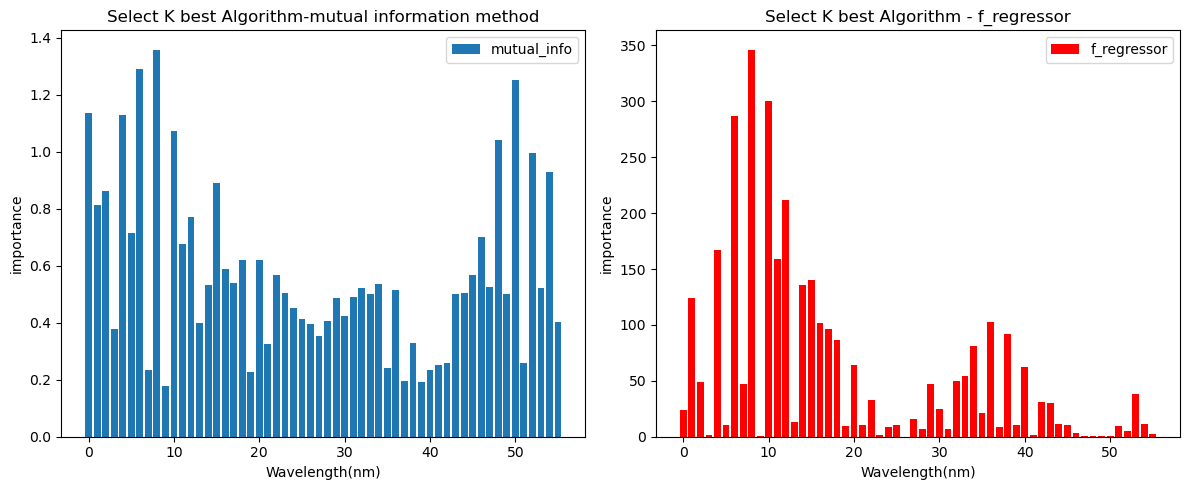

In [55]:
plt.figure(figsize=(12, 5)) 

plt.subplot(1, 2, 1)
plt.bar([i for i in range(len(fs_mut.scores_))], fs_mut.scores_, label='mutual_info')
plt.title('Select K best Algorithm-mutual information method')
plt.xlabel('Wavelength(nm)')
plt.ylabel('importance')
plt.legend()

plt.subplot(1, 2, 2) 
plt.bar([i for i in range(len(fs_f.scores_))], fs_f.scores_, label='f_regressor', color='red')
plt.title('Select K best Algorithm - f_regressor')
plt.xlabel('Wavelength(nm)')
plt.ylabel('importance')
plt.legend()

plt.tight_layout()

plt.show()

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, shuffle=True, test_size=0.2)


In [ ]:
X_trainval, X_valid, y_trainval, y_valid = train_test_split(X_train, y_train, shuffle=True,  random_state=42)


In [ ]:
def objective(trial):
    param = {
        'tree_method':'gpu_hist',  # this parameter means using the GPU when training our model to speedup the training process
        'sampling_method': 'gradient_based',
        'lambda': trial.suggest_loguniform('lambda', 7.0, 17.0),
        'alpha': trial.suggest_loguniform('alpha', 7.0, 17.0),
        'eta': trial.suggest_categorical('eta', [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]),
        'gamma': trial.suggest_categorical('gamma', [18, 19, 20, 21, 22, 23, 24, 25]),
        'learning_rate': trial.suggest_categorical('learning_rate', [0.008,0.01,0.012,0.014,0.016,0.018, 0.02]),
        'colsample_bytree': trial.suggest_categorical('colsample_bytree', [0.3,0.4,0.5,0.6,0.7,0.8,0.9, 1.0]),
        'colsample_bynode': trial.suggest_categorical('colsample_bynode', [0.3,0.4,0.5,0.6,0.7,0.8,0.9, 1.0]),
        'n_estimators': trial.suggest_int('n_estimators', 400, 1000),
        'min_child_weight': trial.suggest_int('min_child_weight', 8, 600),  
        'max_depth': trial.suggest_categorical('max_depth', [3, 4, 5, 6, 7]),  
        'subsample': trial.suggest_categorical('subsample', [0.5,0.6,0.7,0.8,1.0]),
        'random_state': 42
    }

    model = XGBRegressor(**param)  
    
    model.fit(X_trainval, y_trainval, eval_set=[(X_valid, y_valid)], early_stopping_rounds=10, verbose=False)
    
    predict = model.predict(X_valid)
    
    r_2 = r2_score(predict, y_valid)
    
    return r_2


study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50,  timeout=600)
    
print("Number of finished trials: {}".format(len(study.trials)))
print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))

print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))